# LDA Visualizations 

## Setup

In [24]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pyLDAvis.gensim
import pickle
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
from gensim.test.utils import datapath
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import math
import clean 
import model_lda
import analyze

In [25]:
#define path names
raw_file = 'data/documents_raw.pkl'
clean_file = 'data/documents_clean.pkl' 
model_file = 'data/model.gensim' 
DTM_file = 'data/DTM.pkl'
dict_file = 'data/dictionary.gensim'

In [26]:
warnings.filterwarnings("ignore", category=UserWarning)

#preprocess 
clean_docs = clean.dataClean(raw_file,FILTER= True,STEM=False)

#make dictionary from documents
dictionary = model_lda.makeDict(clean_docs)

#make document-term-matrix from docs,dictionary
DTM = model_lda.makeDTM(clean_docs,dictionary)


In [27]:
#ldamodel = LdaModel.load(model_file)

## Identify Number of Topics

In [28]:
n_pass = 20
start = 2
stop = 30
step = 2

#FYI: this step takes a long time to run
model_list, coherence_values = analyze.coherenceByNumTopics(
            DTM, dictionary, clean_docs, n_pass, stop, start, step)

In [29]:
print(len(coherence_values))

14


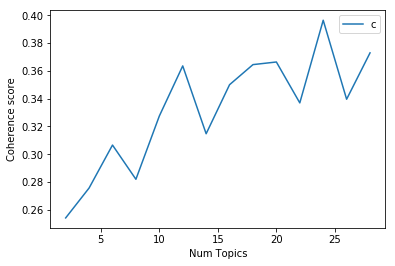

In [30]:
analyze.plotCoherence(coherence_values, start, stop, step)

Examine the above plot to identify which value of N_TOPICS maximizes the coherence value (or the point at which they plateau).

In [31]:
N_TOPICS = 12 #default, but can be changed based on results from above 
N_PASS = 50 #this can also be changed, but longer usually = better

In [32]:
ldamodel = model_lda.LDA(DTM,dictionary, N_TOPICS, N_PASS)

## Word Clouds

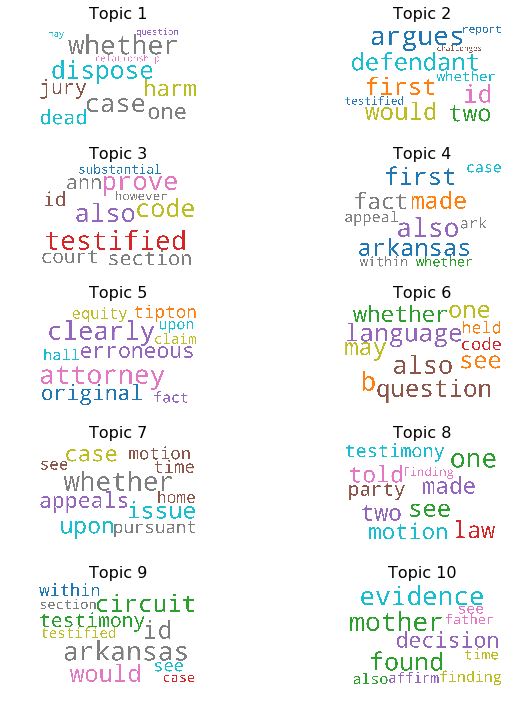

In [33]:
def topicCloud(model,N_TOPICS): 
    
    cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2000,
                      max_words=10,
                      colormap='tab10',
                      prefer_horizontal=1.0)
    
    topics = model.show_topics(formatted=False)
    h = math.ceil(N_TOPICS/2)
    fig, axes = plt.subplots(h, 2, figsize=(10,10), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=500)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
        plt.gca().axis('off')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
    return
#topicCloud(ldamodel,N_TOPICS)
topicCloud(ldamodel,10)

# Interactive Visualizations

In [27]:
warnings.filterwarnings("ignore", category=FutureWarning)
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim.prepare(ldamodel, DTM, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)


 # Model Perplexity and Coherence 


In [28]:
perplexity_score = ldamodel.log_perplexity(DTM)
coherence_model_lda = CoherenceModel(model=ldamodel, texts=clean_docs, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print('\nPerplexity: ', perplexity_score)
print('\nCoherence: ', coherence_score)



Perplexity:  -7.25128184091541

Coherence:  0.3119727924730927
